# Interactive visualisation with Altair and Vega-Lite
+ date:2018-07-16
+ tags:streeteasy, python, vis
+ author:Philipp Kats
+ summary: Showcasing Altair's interactive capabilites


All examples are copied from [Altair Gallery](https://altair-viz.github.io/gallery/index.html)

**NOTE: for now all vis is static, use `editor` link below the chart to check interactive output; 
I hope to rebuild this interaction at some point**

In [4]:
import altair as alt
from vega_datasets import data

## Example 1: Seattle Weather

In [5]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

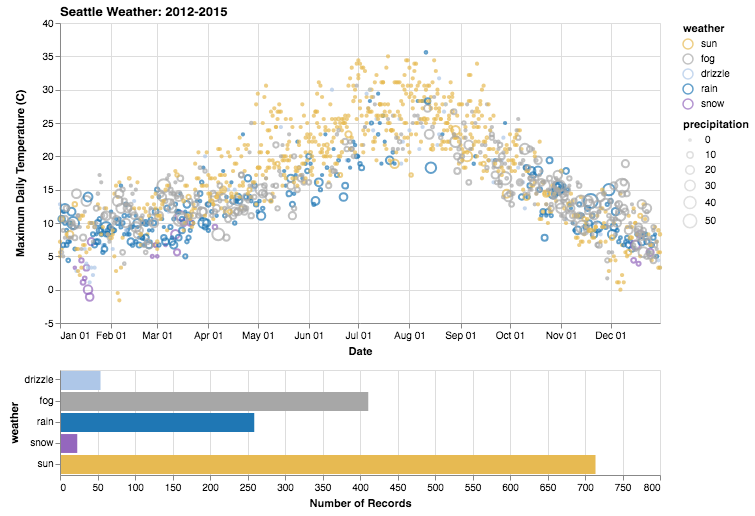

In [6]:
# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('monthdate(date):T', axis=alt.Axis(title='Date')),
    alt.Y('temp_max:Q',
        axis=alt.Axis(title='Maximum Daily Temperature (C)'),
        scale=alt.Scale(domain=[-5, 40])
    ),
    color=alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=600,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=600,
).add_selection(
    click
)

alt.vconcat(points, bars,
    data=data.seattle_weather.url,
    title="Seattle Weather: 2012-2015"
)  



## Example 2

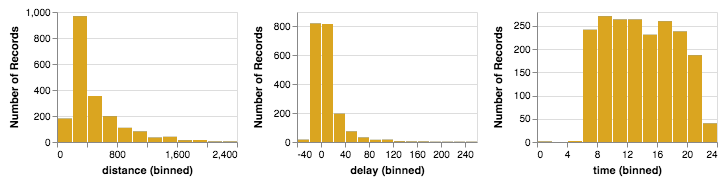

In [8]:

flights = alt.UrlData(data.flights_2k.url,
                      format={'parse': {'date': 'date'}})

brush = alt.selection(type='interval', encodings=['x'])

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=20)),
    y='count()'
).properties(
    width=180,
    height=130
)

# blue background with selection
background = base.properties(
    selection=brush
)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('goldenrod')
).transform_filter(
    brush
)

# layer the two charts & repeat
alt.layer(
    background, highlight,
    data=flights
).transform_calculate(
    "time", "hours(datum.date)"
).repeat(
    column=["distance", "delay", "time"]
)